$$
Oasis Infobyte Internship
$$

Name: Mayuri Kale

Email: mayurikale1947@gmail.com


Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
 features of the car, horsepower and the mileage it gives and many more. Car price
 prediction is one of the major research areas in machine learning. So if you want to learn
 how to train a car price prediction model then this project is for you

 

## Data Preparation

**Import necessary libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

**Load the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv("car data.csv")

# Display the first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Statistical information about data**

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Check for Missing Values**

In [6]:
# Check for missing values
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**Understand Data Types**

In [7]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

## Exploratory Data Analysis (EDA)

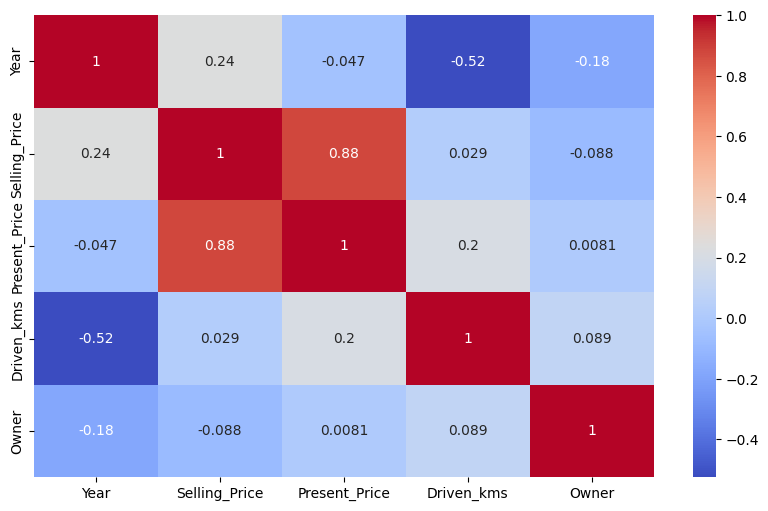

In [9]:
# Check feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

This is a correlation heatmap of the dataset's numerical features. Here’s what it tells us:

1. Present_Price & Selling_Price (0.88) - Strong positive correlation. This means that cars with a higher original price tend to have a higher selling price.

2. Year & Driven_kms (-0.52) - Moderate negative correlation. Older cars tend to have more kilometers driven.

3. Year & Selling_Price (0.24) - Weak positive correlation. Newer cars slightly tend to have a higher selling price.

4. Owner & Selling_Price (-0.088) - Almost no correlation, meaning the number of previous owners doesn't strongly impact selling price.

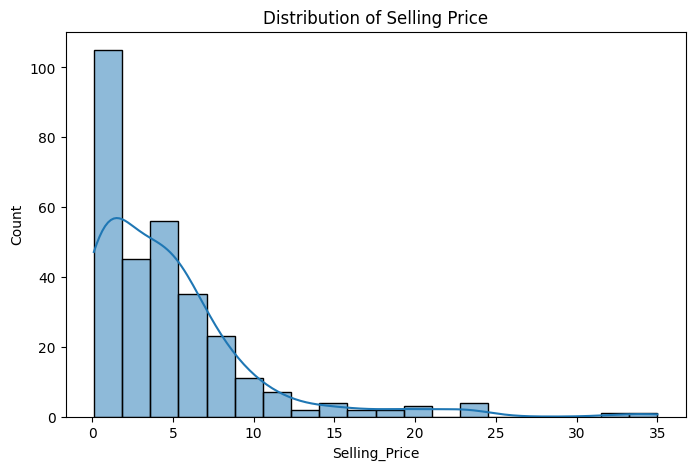

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

## Feature Engineering

In [11]:
# Create new feature Car_Age
df['Car_Age'] = 2024 - df['Year']
df = df.drop(columns=['Year', 'Car_Name'])


In [12]:
# Encode categorical variables (e.g., Fuel Type, Selling Type, Transmission)
car_data = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


## Data Splitting

In [13]:
# Splitting data into features and target
X = car_data.drop(columns=['Selling_Price'])  # Features
y = car_data['Selling_Price']  # Target

In [14]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Display processed data structure
X_train.head()

,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
184,0.750,26000,1,16,0,1,1,1
132,0.950,3500,0,7,0,1,1,1
194,0.787,50000,0,16,0,1,1,1
75,6.800,36000,0,9,0,1,0,1
111,1.500,8700,0,8,0,1,1,1


## Model Training and Evaluation

**Linear Regression**

In [16]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:",mae)
print("Root Mean Square Error:",rmse)
print("R² Score:",r2)

Mean Absolute Error: 1.216374019333035
Root Mean Square Error: 1.8658375680942374
R² Score: 0.8488707839193154


-> Linear Regression Model has performed well with an R² score of 0.85, meaning it explains 85% of the variance in car prices


**Random Forest**

In [19]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Predictions
y_rf_pred = rf_model.predict(X_test)

In [21]:
# Model Evaluation
mae_rf = mean_absolute_error(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
r2_rf = r2_score(y_test, y_rf_pred)
print("Mean Absolute Error:",mae_rf)
print("Root Mean Square Error:",rmse_rf)
print("R² Score:",r2_rf)


Mean Absolute Error: 0.6368655737704919
Root Mean Square Error: 0.9664050903676592
R² Score: 0.9594566919773236


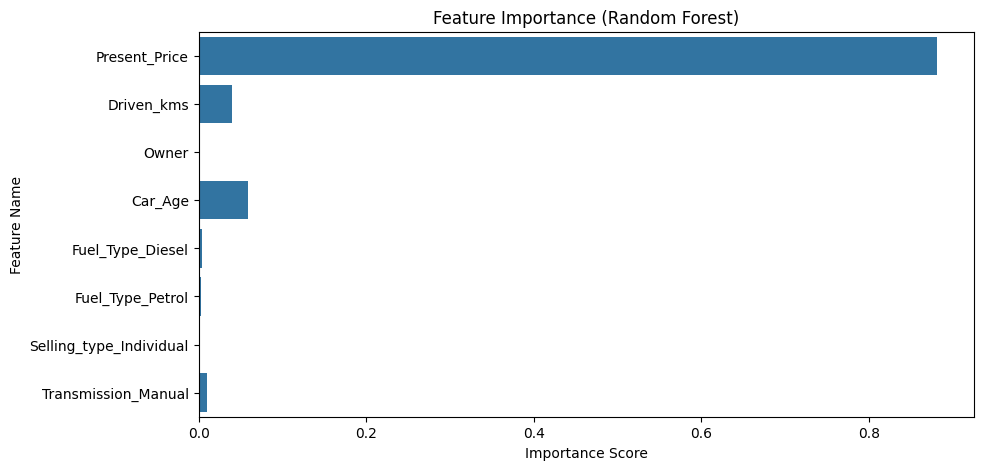

In [22]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


## Conclusion

Random Forest outperformed Linear Regression, making it a better choice for predicting car prices due to its ability to handle non-linearity and complex relationships.

Further improvements could be made using advanced regression techniques (e.g., Lasso/Ridge regression).